In [58]:
#Import libraries to Python
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#Load our dataset into Python

QB = pd.read_excel('QBStats_all_new.xlsx',index_col=0)

#Below overview of how data is presented in Excel file

QB.head(10)

,Attempt,Completion,Yards,Yards per attempt,Touchdowns,Interceptions,Longest,Sack,Loss,QB Rating,Points,Home/Away,Year,Outcome
Quarterback,,,,,,,,,,,,,,
Drew Brees,19,15,160,8.4,2,0,30,1,0,136.8,34,away,2002,W
Drew Bledsoe,39,26,271,6.9,1,2,52,4,29,73.8,31,home,2002,L
Peyton Manning,31,19,211,6.8,3,0,28,1,8,113.8,28,away,2002,W
Quincy Carter,30,13,131,4.4,0,1,31,3,19,42.5,10,away,2002,L
Tom Brady,43,29,294,6.8,3,0,40t,2,14,110.0,30,home,2002,W
Peyton Manning,45,26,289,6.4,1,3,33,0,0,56.6,13,home,2002,L
Quincy Carter,24,14,240,10.0,2,0,44,1,10,120.1,21,home,2002,W
Tom Brady,35,25,269,7.7,2,1,49t,0,0,100.8,44,away,2002,W
Drew Brees,28,15,163,5.8,1,1,35t,2,20,68.0,24,home,2002,W


In [60]:
#Based on output below, we have 1,214 data numbers. 

QB1 = QB['Outcome']
QB1.shape


(1214,)

In [62]:
#Import libraries again with dataset

import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

QB=pd.read_excel('QBStats_all_new.xlsx')

#Show the columns of the dataset. We have 15 different variables, so 0-14 in Python.

print(QB.shape)
print(list(QB.columns))

(1214, 15)
['Quarterback', 'Attempt', 'Completion', 'Yards', 'Yards per attempt', 'Touchdowns', 'Interceptions', 'Longest', 'Sack', 'Loss', 'QB Rating', 'Points', 'Home/Away', 'Year', 'Outcome']


In [63]:
#List of the different Quarterbacks in the dataset. Are there to few maybe?

QB['Quarterback'].unique()

array(['Drew Brees', 'Drew Bledsoe', 'Peyton Manning', 'Quincy Carter',
       'Tom Brady', 'Chad Hutchinson', 'Kerry Collins',
       'Ben Roethlisberger', 'Chad Pennington', 'Matt Ryan',
       'Carson Palmer', 'Joe Flacco', 'Eli Manning', 'Philip Rivers',
       'Chad Henne', 'Vince Young', 'Chris Redman', 'Rusty Smith',
       'Matt Hasselbeck', 'Andy Dalton', 'Matt Moore', 'Curtis Painter',
       'Dan Orlovsky', 'Ryan Fitzpatrick', 'Mark Sanchez',
       'Brandon Weeden', 'Russell Wilson', 'Alex Smith', 'Aaron Rodgers',
       'Colin Kaepernick', 'E.J. Manuel', 'Geno Smith', 'Matt Flynn',
       'Kyle Orton', 'Jay Cutler', 'Brian Hoyer', 'Kirk Cousins',
       'Blake Bortles', 'Matthew Stafford', 'Jameis Winston',
       'Derek Carr', 'Tony Romo', 'Sam Bradford', 'Teddy Bridgewater',
       'Matt Cassel', 'Carson Wentz', 'Dak Prescott', 'Matt Barkley'],
      dtype=object)

In [64]:
#Value count of wins and losses. There is slight overweight of wins. Is this a problem?

QB['Outcome'].value_counts()

W    688
L    526
Name: Outcome, dtype: int64

In [65]:
#The average stats of a losing QB and a winnign QB. Interesting to see that a winning QB on average throws 4.5 fewer times than
# a losing QB. Otherwise, stats seem reasonable.

QB.groupby('Outcome').mean()

,Attempt,Completion,Yards,Yards per attempt,Touchdowns,Interceptions,Sack,Loss,QB Rating,Points,Year
Outcome,,,,,,,,,,,
L,36.996198,22.186312,241.996198,6.500760,1.159696,1.319392,2.522814,16.836502,74.104183,17.072243,2011.201521
W,32.354651,21.186047,257.154070,8.087791,1.956395,0.489826,1.656977,10.623547,103.795058,29.062500,2011.146802


In [68]:
#Means of the different QB. Some QB are way better in the "most" important categories. Problem for dataset?

QB.groupby('Quarterback').mean().head(10)

,Attempt,Completion,Yards,Yards per attempt,Touchdowns,Interceptions,Sack,Loss,QB Rating,Points,Year
Quarterback,,,,,,,,,,,
Aaron Rodgers,33.846154,22.461538,277.435897,8.307692,2.307692,0.487179,2.410256,14.076923,107.705128,28.974359,2013.025641
Alex Smith,21.888889,15.666667,177.111111,8.200000,1.444444,0.555556,2.444444,14.222222,108.977778,22.888889,2012.000000
Andy Dalton,33.400000,19.333333,221.133333,6.573333,1.266667,0.866667,1.400000,9.933333,79.713333,21.133333,2011.000000
Ben Roethlisberger,33.523810,21.452381,276.309524,8.373810,1.523810,0.738095,2.904762,19.928571,97.404762,22.333333,2010.000000
Blake Bortles,38.258065,22.612903,262.741935,6.916129,1.806452,1.064516,2.645161,16.032258,84.390323,21.677419,2015.516129
Brandon Weeden,35.952381,20.285714,237.571429,6.680952,1.095238,1.238095,2.523810,16.857143,74.261905,19.380952,2012.333333
Brian Hoyer,34.700000,21.200000,248.300000,7.270000,1.900000,0.600000,2.300000,17.500000,94.560000,21.900000,2015.000000
Carson Palmer,35.080645,21.758065,257.548387,7.475806,1.741935,0.919355,1.887097,13.645161,90.719355,24.209677,2012.500000
Carson Wentz,38.600000,24.200000,242.933333,6.446667,1.000000,0.800000,2.200000,14.200000,82.313333,23.066667,2016.000000


In [69]:
#Number of times the QB is listed in the dataset. P. Manning listed 111 times. Too many maybe?

QB['Quarterback'].value_counts().head(10)

Peyton Manning        111
Tom Brady              78
Drew Brees             72
Carson Palmer          62
Philip Rivers          47
Eli Manning            47
Joe Flacco             45
Russell Wilson         44
Matt Ryan              43
Ben Roethlisberger     42
Name: Quarterback, dtype: int64

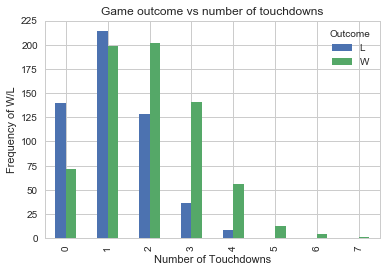

In [279]:
#Graph on number of touchdowns vs. outcome of the game

%matplotlib inline


pd.crosstab(QB.Touchdowns,QB.Outcome).plot(kind='bar')
plt.title('Game outcome vs number of touchdowns')
plt.xlabel('Number of Touchdowns')
plt.ylabel('Frequency of W/L')
plt.savefig('Statistik over sejre 2')  

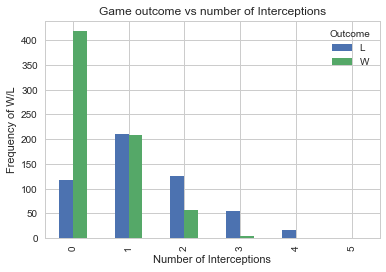

In [270]:
#Graph on number of interceptions vs. outcome of game

pd.crosstab(QB.Interceptions,QB.Outcome).plot(kind='bar')
plt.title('Game outcome vs number of Interceptions')
plt.xlabel('Number of Interceptions')
plt.ylabel('Frequency of W/L')
plt.savefig('Statistik over sejre')  

In [70]:
#Logistic Regression. We use below variables, and let Python create a random training and test samlpe with a 80/20 percentage.
#We have excluded year and home/away, as we where not sure yet how to preprocess it. The model has a 79.4 % accuracy prediction rate

cols = ["Attempt","Completion","Yards","Yards per attempt","Touchdowns","Interceptions","Sack","Loss",]

QB_final = QB[cols]

X = QB_final
Y = QB1

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score

accuracy_score(Y_test,log.predict(X_test))



0.7736625514403292

In [71]:
from sklearn import metrics

Y_pred=log.predict(X_test)

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

cnf_matrix

array([[ 76,  35],
       [ 20, 112]], dtype=int64)

Text(0.5,257.44,'Predicted label')

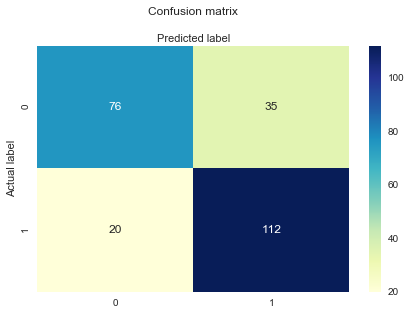

In [72]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred, average='binary', pos_label="W"))

print("Recall:",metrics.recall_score(Y_test, Y_pred, average='binary', pos_label="W"))

Accuracy: 0.7736625514403292
Precision: 0.7619047619047619
Recall: 0.8484848484848485


Optimal number of features: 6
Selected features: ['Attempt', 'Completion', 'Yards per attempt', 'Touchdowns', 'Interceptions', 'Sack']


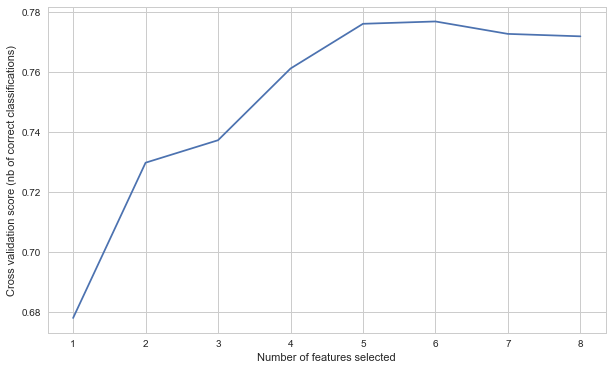

In [74]:
# Feature selection

from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

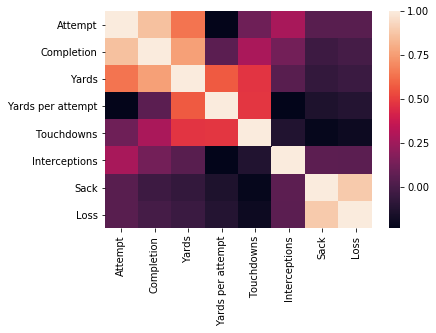

In [28]:
import seaborn as sns

sns.heatmap(X.corr())
plt.show()

In [75]:
# Decision tree model with Gini index as criterion

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)

y_pred = clf_gini.predict(X_test)
y_pred

print("Gini Accuracy is", accuracy_score(Y_test,y_pred)*100)



Gini Accuracy is 69.1358024691358


In [76]:
# Decision tree with information gain as criterion

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

y_pred_en = clf_entropy.predict(X_test)

print("Information gain Accuracy is", accuracy_score(Y_test,y_pred_en)*100)



Information gain Accuracy is 69.95884773662551


In [83]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train[['Attempt','Completion','Yards','Yards per attempt','Touchdowns','Interceptions','Sack','Loss']], Y_train)

accuracy_score(Y_test,knn.predict(X_test[['Attempt','Completion','Yards','Yards per attempt','Touchdowns','Interceptions','Sack','Loss']]))






0.6296296296296297

In [78]:
# Here is the guessing model supposed to be...

# Scaler

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

X_train_minmax=min_max.fit_transform(X_train[['Attempt','Completion','Yards','Yards per attempt','Touchdowns','Interceptions','Sack','Loss']])

X_test_minmax=min_max.fit_transform(X_test[['Attempt','Completion','Yards','Yards per attempt','Touchdowns','Interceptions','Sack','Loss']])

# Applying the scaled data in our KNN=8 model

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_minmax,Y_train)

accuracy_score(Y_test,knn.predict(X_test_minmax))

# We get a slightly better prediction by scaling. So, there must be some numbers with a broad range that worsens our model.

0.7860082304526749

In [79]:
from sklearn.metrics import classification_report, confusion_matrix  
  
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          L       0.79      0.68      0.73       111
          W       0.76      0.85      0.80       132

avg / total       0.78      0.77      0.77       243



Text(0,0.5,'Mean Error')

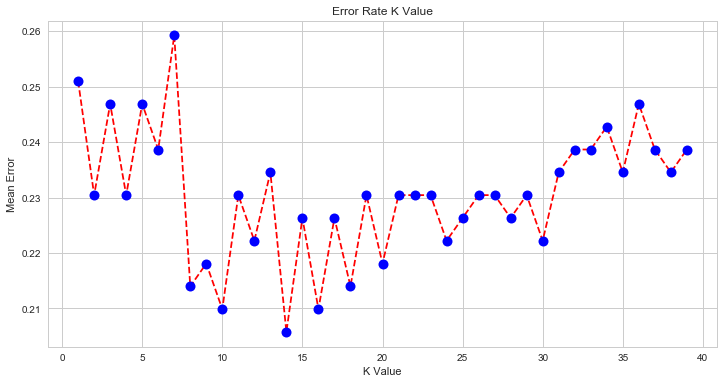

In [81]:
# Calculating error for K values between 1 and 40
error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_minmax, Y_train)
    pred_i = knn.predict(X_test_minmax)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [85]:
from sklearn.metrics import roc_curve, auc
>>> from scipy import interp
>>> pipe_lr = make_pipeline(StandardScaler(),
... PCA(n_components=2),
... LogisticRegression(penalty='l2',
... random_state=1,
... C=100.0))
>>> X_train2 = X_train
>>> cv = list(StratifiedKFold(n_splits=3,
... random_state=1).split(X_train,
... y_train))
>>> fig = plt.figure(figsize=(7, 5))
>>> mean_tpr = 0.0

mean_fpr = np.linspace(0, 1, 100)
>>> all_tpr = []
>>> for i, (train, test) in enumerate(cv):
... probas = pipe_lr.fit(X_train2[train],
... y_train[train]).predict_proba(X_train2[test])
... fpr, tpr, thresholds = roc_curve(Y_train[test],
... probas[:, 1],
... pos_label=1)
>>> mean_tpr += interp(mean_fpr, fpr, tpr)
>>> mean_tpr[0] = 0.0
>>> roc_auc = auc(fpr, tpr)
>>> plt.plot(fpr,
... tpr,
... label='ROC fold %d (area = %0.2f)'
... % (i+1, roc_auc))
>>> plt.plot([0, 1],
... [0, 1],
... linestyle='--',
... color=(0.6, 0.6, 0.6),
... label='random guessing')
>>> mean_tpr /= len(cv)
>>> mean_tpr[-1] = 1.0
>>> mean_auc = auc(mean_fpr, mean_tpr)
>>> plt.plot(mean_fpr, mean_tpr, 'k--',
... label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
>>> plt.plot([0, 0, 1],
... [0, 1, 1],
... linestyle=':',
... color='black',
... label='perfect performance')
>>> plt.xlim([-0.05, 1.05])
>>> plt.ylim([-0.05, 1.05])
>>> plt.xlabel('false positive rate')
>>> plt.ylabel('true positive rate')
>>> plt.legend(loc="lower right")
>>> plt.show()



IndentationError: expected an indented block (<ipython-input-85-808294bc08de>, line 18)